In [1]:
import NDEToolkit as ndt

### Class

In [2]:
import math
import numpy as np

class CscanManager:

    def __init__(self):
        
        self.gate1 = []
        self.gate2 = []
        self.gate3 = []

    def define_gate1(self,left,right,method = "max", lim = 0,type = 0):

        self.gate1 = [left,right,method,lim,type]
    
    def define_gate2(self,left,right,method = "max", lim = 0,type = 0):

        self.gate2 = [left,right,method,lim,type]
    
    def define_gate3(self,left,right,method = "max", lim = 0,type = 0):

        self.gate3 = [left,right,method,lim,type]
    

    def compute(self,data):

        gm = ndt.gateManager()

        if not self.gate1[4] :
            
            peak1 = gm.ifGate(data,self.gate1[0],self.gate1[1],lim=self.gate1[3],method=self.gate1[2])

        else:

            peak1 = gm.negativeGate(data,self.gate1[0],self.gate1[1],lim=self.gate1[3],method=self.gate1[2])
        
        
        if not peak1:

            return 0


        if not self.gate2[4] :

            peak2 = gm.ifGate(data,self.gate2[0],self.gate2[1],lim=self.gate2[3],method=self.gate2[2])
        
        else:

            peak2 = gm.negativeGate(data,self.gate2[0],self.gate2[1],lim=self.gate2[3],method=self.gate2[2])

        
        if not self.gate3[4] :
            
            peak3 = gm.ifGate(data,self.gate3[0],self.gate3[1],lim=self.gate3[3],method=self.gate3[2])

        else:

            peak3 = gm.negativeGate(data,self.gate3[0],self.gate3[1],lim=self.gate3[3],method=self.gate3[2])
        

        if not peak3:

            return 0
            
        return ((10 *  np.log10(np.divide(peak2, peak1)+0.0001)) *(-2))
    
    def compute_3(self,data):

        gm = ndt.gateManager()

        if not self.gate1[4] :
            
            peak1 = gm.ifGate(data,self.gate1[0],self.gate1[1],lim=self.gate1[3],method=self.gate1[2])

        else:

            peak1 = gm.negativeGate(data,self.gate1[0],self.gate1[1],lim=self.gate1[3],method=self.gate1[2])
        
        if not peak1:

            return 0

        if not self.gate3[4] :
            
            peak3 = gm.ifGate(data,self.gate3[0],self.gate3[1],lim=self.gate3[3],method=self.gate3[2])

        else:

            peak3 = gm.negativeGate(data,self.gate3[0],self.gate3[1],lim=self.gate3[3],method=self.gate3[2])


            
        return ((10 *  np.log10(np.divide(peak3, 100)+0.0001)) *(-2))




### Pruebas

#### Data import

In [3]:
from pathlib import Path

#Opening file

folder_to_read = Path(r'Q:\11_AIRBUS\02_UltraSounds_Monolithic\Medidas Probetas Planas AIRBUS 5 MHz\WP_6.8_cm_11.6_dB')

tiff_folder = folder_to_read /   r'_ascan852x226x511_WP_6.8_cm_11.6_dB.tiff'

data = ndt.napari_read_tiff(tiff_folder,folder=False)
data.shape

(226, 852, 511)

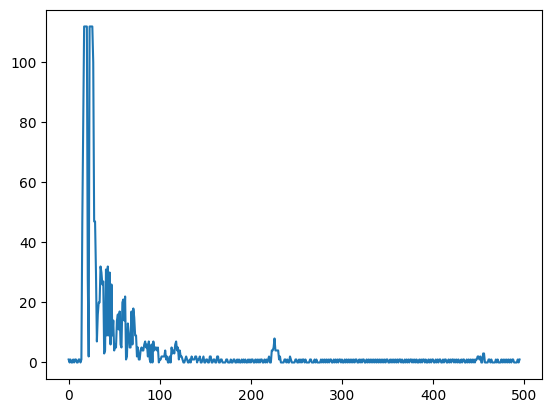

In [245]:
import matplotlib.pyplot as plt

x = 281
y = 400

plt.plot(data[x,y])

In [251]:
import matplotlib.pyplot as plt

rfa = ndt.RfAligner()

aligned = rfa.align(data,30,14,True)

In [252]:
ndt.write_tiff(aligned,folder_to_read / "aligned.tiff")

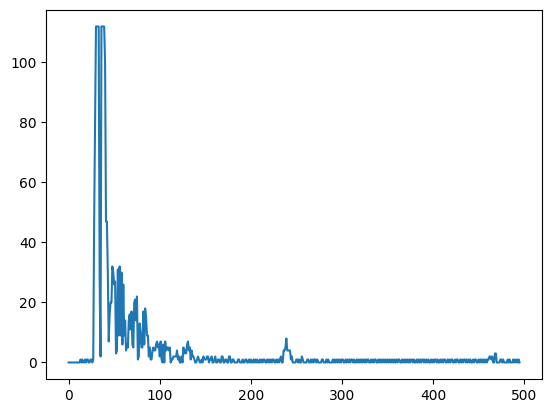

In [253]:
x = 281
y = 400

plt.plot(aligned[x,y])
#plt.ylim(18,25)

### CScan

In [262]:
csm = CscanManager()

In [263]:
csm.define_gate1(0,40, lim = 50)
csm.define_gate2(200,300, lim = 0)
csm.define_gate3(400,500, lim = 0)

In [264]:
csm.compute(aligned[x,y])

22.910408972306954

In [265]:
csm.compute_3(aligned[x,y])

30.428670088123134

In [266]:
att = np.apply_along_axis(csm.compute, 2, aligned)

In [240]:
att = np.apply_along_axis(csm.compute_3, 2, aligned)

In [12]:
att[x,y]

2.6016266130998122

In [267]:
import napari

viewer = napari.view_image(att, colormap='turbo')


In [268]:
ndt.write_tiff(att,folder_to_read / "att.tiff")